# Getting Started with Algorithmic Trading 

In this activity, students will write a trading algorithm that uses Python to represent the conditions of a simple trading strategy.

## Background

You work on a trading firm that started operations a century ago. The firm is well consolidated and has prominent customers. As a FinTech professional, you were hired to drive innovation. Your manager, Alina, asked you to prepare a prototype to show algorithmic trading capabilities to the Board of Directors so they can understand how it works.

You decided to start with a simple trading algorithm based on rules and Python conditionals to present the fundamentals of transforming a mental trading strategy into a functional Python code.

## Instructions:

1. Using the data that the starter notebook supplies, run the code cells that import the required libraries, and then create a Pandas DataFrame named `amd_df`.

2. Use the Pandas `bdate_range` function to assign dates to the values in the DataFrame. Set the dates as the DataFrame index. Use `2019-09-30` for the starting date.

3. Visualize the price movement of the DataFrame by using the Pandas `plot` function.

4. Add a column named “trade_type” to the DataFrame that will hold the buys and sells and set it equal to `np.nan`. Then, initialize a variable named `previous_price` that is set equal to `0`.

5. Write an algorithm that loops through each index and row of the DataFrame by using the Pandas `iterrows` function. Make sure that the algorithm checks the following conditions and executes the strategy for each one:

    * If `previous_price = 0`, use the `loc` function to set the “trade_type” column for the current index to “buy”.

    * Otherwise, if the price of the current day is less than that of the previous day, set the “trade_type” column for the current index to “buy”.

    * Otherwise, if the price of the current day is greater than that of the previous day, set the “trade_type” column for the current index to “sell”.

    * Otherwise, if the price of the current day is equal to that of the previous day, set the “trade_type” column of the current index to “hold”.

    * If the current index is equal to the last index of the DataFrame, set the “trade_type” column for the current index to “sell”. (Use the `index` function to check the current index.)

6. Run the algorithm. Then review the resulting DataFrame to confirm that given the closing prices, the “trade_type” column populated as expected.

## References:

* [Pandas `bdate_range` function documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.bdate_range.html)

* [Pandas `iterrows` function documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html)


## Step 1: Using the data that the starter notebook supplies, run the code cells that import the required libraries, and then create a Pandas DataFrame named `amd_df`.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

In [2]:
# Closing prices for AMD stock
amd_data = [28.99, 28.76, 28.31, 28.68, 29.01, 28.93, 28.23, 28.46, 28.38, 29.75,]

In [3]:
# Create the Pandas DataFrame using the price information supplied
amd_df = pd.DataFrame(
    {'close' : amd_data}
)

# Review the DataFrame
amd_df

,close
0,28.99
1,28.76
2,28.31
3,28.68
4,29.01
5,28.93
6,28.23
7,28.46
8,28.38
9,29.75


## Step 2: Use the Pandas `bdate_range` function to assign dates to the values in the DataFrame. Set the dates as the DataFrame index. Use `2019-09-30` for the starting date.

In [4]:
# Set the index as datetime objects starting from 2019-09-09 and onwards (but only business days)
amd_df.index = pd.bdate_range(start='2019-09-30', periods=10)

# Review the DataFrame
amd_df

,close
2019-09-30,28.99
2019-10-01,28.76
2019-10-02,28.31
2019-10-03,28.68
2019-10-04,29.01
2019-10-07,28.93
2019-10-08,28.23
2019-10-09,28.46
2019-10-10,28.38
2019-10-11,29.75


## Step 3: Visualize the price movement of the DataFrame by using the `plot` function.

<AxesSubplot:>

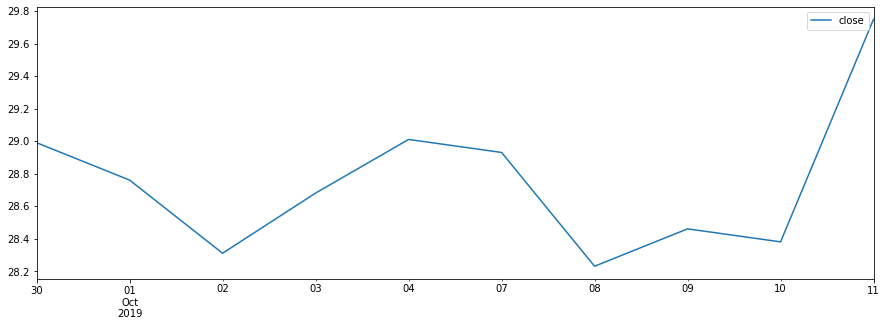

In [5]:
# Visualize the DataFrame using the plot function 
amd_df.plot(figsize = (15,5))

## Step 4: Add a column named “trade_type” to the DataFrame that will hold the buys and sells and set it equal to `np.nan`. Then, initialize a variable named `previous_price` that is set equal to `0`.

In [6]:
# Initialize trade_type column for buys and sells
amd_df['trade_type'] = np.nan

# Initialize variable to hold the previous_price
previous_price = 0

## Step 5: Write an algorithm that loops through each index and row of the DataFrame by using the Pandas `iterrows` function.

In [7]:
# Loop through the Pandas DataFrame and code the conditions of the trading strategy 
for index, row in amd_df.iterrows():    
    
    # buy if previous price equals 0 
    if previous_price == 0: 
        amd_df.loc[index, 'trade_type'] = 'buy'
    
    # otherwise, buy if price of current day is less than the previous day
    elif row['close'] < previous_price: 
        amd_df.loc[index, 'trade_type'] = 'buy'

    # otherwise, sell if the price of the current day is greater than the previous day
    elif row['close'] > previous_price: 
        amd_df.loc[index, 'trade_type'] = 'sell'
    
    # otherwise, hold if the price of the current day is equal to the previous day 
    else: 
        amd_df.loc[index, 'trade_type'] = 'hold'

    # sell if the current index is equal to the last index
    if index == amd_df.index[-1]: 
        amd_df.loc[index, 'trade_type'] = 'sell'

## Step 6: Run the algorithm. Then review the resulting DataFrame to confirm that given the closing prices, the “trade_type” column populated as expected.

In [8]:
# Run the algorithm and review the DataFrame
amd_df

,close,trade_type
2019-09-30,28.99,buy
2019-10-01,28.76,buy
2019-10-02,28.31,buy
2019-10-03,28.68,buy
2019-10-04,29.01,buy
2019-10-07,28.93,buy
2019-10-08,28.23,buy
2019-10-09,28.46,buy
2019-10-10,28.38,buy
2019-10-11,29.75,sell
